# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#build query url
url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="
count = 0

# open new file for data
with open("output_data/weather_data.csv", "w") as weather_data:
    weather_writer = csv.writer(weather_data, delimiter=",")
    weather_writer.writerow(["City", "Lat", "Lng", "Max Temp", \
                            "Humidity", "Cloudiness", "Wind Speed", \
                            "Country", "Date"])
    print("Beginning Data Retrieval")
    print("-----------------------------------")
    
    # loop for api requests
    for city1 in cities:
        query_url= url + city1
        weather_json=requests.get(query_url).json()
        try:
            lat = weather_json["coord"]["lat"]
            lng = weather_json["coord"]["lon"]
            max_temp = round(weather_json["main"]["temp_max"] * 9 / 5 - 459.67, 2)
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"]
            country = weather_json["sys"]["country"]
            date = weather_json["dt"]
        except KeyError:
            print("City not found. Skipping...")
            continue 
        weather_writer.writerow([city1, lat, lng, max_temp, humidity, \
                            cloudiness, wind_speed, country, date])
        count += 1
        print(f"Processing Record {count} | {city1}")
    print("-----------------------------------")
    print("Data Retrieval Complete")
    print("-----------------------------------")


Beginning Data Retrieval
-----------------------------------
City not found. Skipping...
Processing Record 1 | hobart
Processing Record 2 | bathsheba
City not found. Skipping...
Processing Record 3 | berovo
Processing Record 4 | ikom
City not found. Skipping...
Processing Record 5 | kenai
Processing Record 6 | lompoc
Processing Record 7 | georgetown
Processing Record 8 | bluff
Processing Record 9 | maceio
Processing Record 10 | sao filipe
Processing Record 11 | albany
Processing Record 12 | road town
Processing Record 13 | east london
Processing Record 14 | clyde river
Processing Record 15 | jamestown
City not found. Skipping...
Processing Record 16 | thompson
Processing Record 17 | tsumeb
Processing Record 18 | hasaki
Processing Record 19 | kavieng
Processing Record 20 | tupelo
Processing Record 21 | pitimbu
Processing Record 22 | bengkulu
Processing Record 23 | victoria
Processing Record 24 | atuona
Processing Record 25 | torbay
Processing Record 26 | kapaa
Processing Record 27 | pun

City not found. Skipping...
Processing Record 230 | usogorsk
Processing Record 231 | faya
Processing Record 232 | kamina
Processing Record 233 | asau
City not found. Skipping...
Processing Record 234 | luderitz
Processing Record 235 | tessalit
Processing Record 236 | saint-augustin
Processing Record 237 | rhondda
Processing Record 238 | luebo
Processing Record 239 | balkanabat
Processing Record 240 | mackenzie
Processing Record 241 | the valley
Processing Record 242 | yerbogachen
Processing Record 243 | darovskoy
Processing Record 244 | shumskiy
Processing Record 245 | voorst
Processing Record 246 | ihosy
Processing Record 247 | pisco
Processing Record 248 | bredasdorp
Processing Record 249 | bonnyville
City not found. Skipping...
Processing Record 250 | port elizabeth
Processing Record 251 | paka
City not found. Skipping...
Processing Record 252 | sitka
Processing Record 253 | qostanay
Processing Record 254 | torit
Processing Record 255 | turochak
Processing Record 256 | neiafu
Proces

City not found. Skipping...
Processing Record 462 | north platte
Processing Record 463 | fukue
Processing Record 464 | blythe
Processing Record 465 | port keats
Processing Record 466 | gamba
Processing Record 467 | kanniyakumari
Processing Record 468 | kibala
Processing Record 469 | galle
Processing Record 470 | wucheng
Processing Record 471 | longyearbyen
Processing Record 472 | vila velha
Processing Record 473 | neman
Processing Record 474 | carupano
Processing Record 475 | tabou
Processing Record 476 | atambua
Processing Record 477 | ponot
Processing Record 478 | ibra
Processing Record 479 | hasilpur
Processing Record 480 | sedam
Processing Record 481 | qui nhon
Processing Record 482 | cam ranh
Processing Record 483 | klaksvik
Processing Record 484 | riberalta
Processing Record 485 | zhezkazgan
Processing Record 486 | atasu
Processing Record 487 | lazaro cardenas
Processing Record 488 | nuuk
Processing Record 489 | bagotville
Processing Record 490 | viedma
Processing Record 491 | zh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Import csv to a dataframe and then check column counts. 
city_data = pd.read_csv("output_data/weather_data.csv")
city_data.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       565
Date          569
dtype: int64

In [5]:
# Display the dataframe
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.88,147.33,44.60,65,40,3.10,AU,1595250685
1,bathsheba,13.22,-59.52,86.00,70,40,8.20,BB,1595250823
2,berovo,41.70,22.86,74.97,42,0,2.97,MK,1595250823
3,ikom,5.97,8.71,78.96,85,88,1.64,NG,1595250824
4,kenai,60.55,-151.26,55.40,93,90,2.10,US,1595250824


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data["Humidity"].max()

100

In [7]:
#  Get the indices of cities that have humidity over 100%.
Index = city_data[city_data["Humidity"] > 100].index.tolist()
print(Index)

[]


In [8]:
# calculate outliers for Humidity
humidity_series = city_data["Humidity"]
quartiles = humidity_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Humidity values below {round(lower_bound, 2)} and above \
{round(upper_bound, 2)} could be outliers.")

Humidity values below 8.5 and above 132.5 could be outliers.


In [9]:
# Get the indices of cities that have humidity lower than the lower_bound. 
# All test runs on data have not included any humidity above upper_bound. 
Index_outliers = city_data[city_data["Humidity"] < lower_bound].index.tolist()
print(Index_outliers)

[46, 142, 325, 347, 396, 538]


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, 
# which we call "clean_city_data".
clean_city_data = city_data.drop(Index_outliers)
clean_city_data.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       559
Date          563
dtype: int64

In [11]:
# Extract relevant fields from the data frame
final_city_data = clean_city_data[["City", "Lat", "Lng", "Max Temp", \
                                   "Humidity", "Cloudiness", "Wind Speed", "Country"]]

# Export the City_Data into a csv
final_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

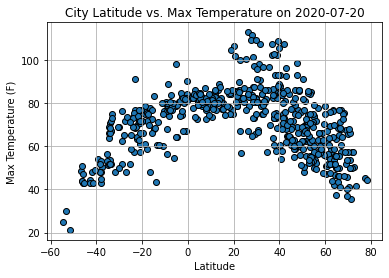

In [12]:
from datetime import date
today = date.today()

latitude = final_city_data["Lat"]
maximum_temperature = final_city_data["Max Temp"]

plt.scatter(latitude, maximum_temperature, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature on {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

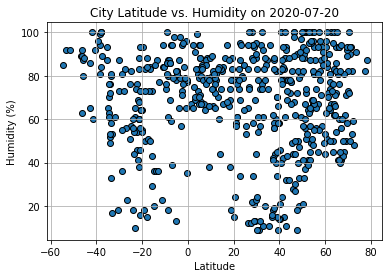

In [13]:
humidity1 = final_city_data["Humidity"]

plt.scatter(latitude, humidity1, edgecolors="black")
plt.title(f"City Latitude vs. Humidity on {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

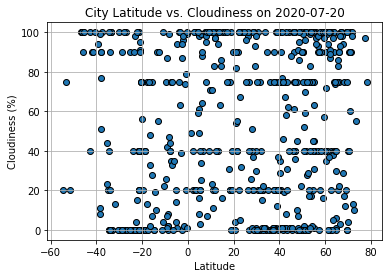

In [14]:
cloudiness1 = final_city_data["Cloudiness"]

plt.scatter(latitude, cloudiness1, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness on {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

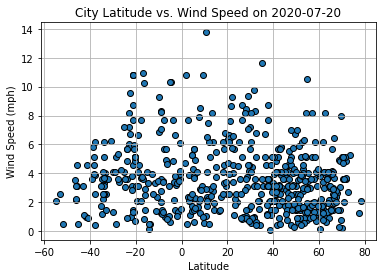

In [15]:
wind_speed1 = final_city_data["Wind Speed"]

plt.scatter(latitude, wind_speed1, edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed on {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern = final_city_data[final_city_data["Lat"] >= 0]
southern = final_city_data[final_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.40075442538410544


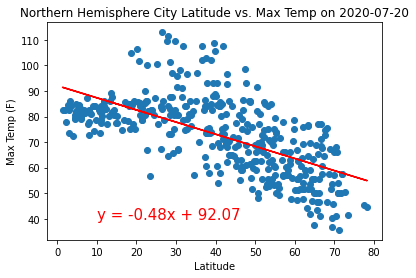

In [18]:
n_lat = northern["Lat"]
n_max_temp = northern["Max Temp"]
x_values = n_lat
y_values = n_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Max Temp on {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5836697822839634


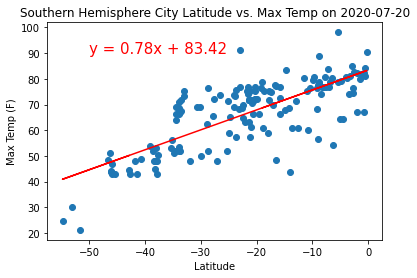

In [19]:
s_lat = southern["Lat"]
s_max_temp = southern["Max Temp"]
x_values = s_lat
y_values = s_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Max Temp on {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003465570268750019


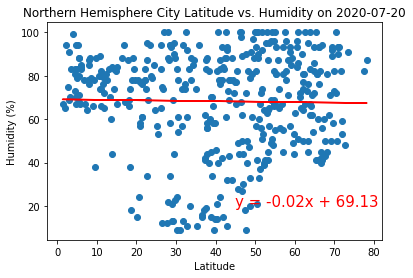

In [20]:
n_humidity = northern["Humidity"]
x_values = n_lat
y_values = n_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Humidity on {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005226343742318547


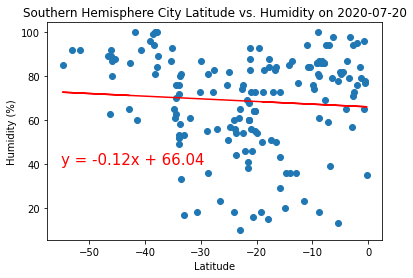

In [21]:
s_humidity = southern["Humidity"]
x_values = s_lat
y_values = s_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Humidity on {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 8.620945917290101e-05


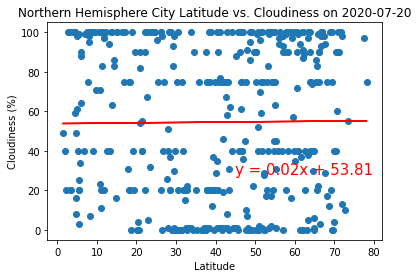

In [22]:
n_cloudiness = northern["Cloudiness"]
x_values = n_lat
y_values = n_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness on {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01640760090959682


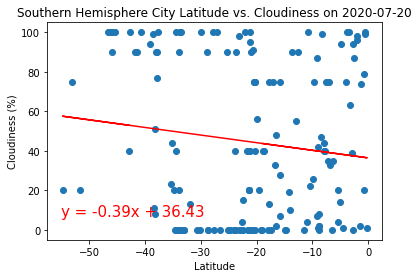

In [23]:
s_cloudiness = southern["Cloudiness"]
x_values = s_lat
y_values = s_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,7),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness on {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026938309823230172


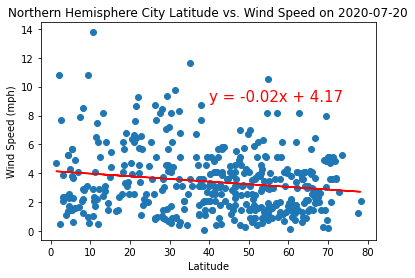

In [24]:
n_wind_speed = northern["Wind Speed"]
x_values = n_lat
y_values = n_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,9),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.016912997438590743


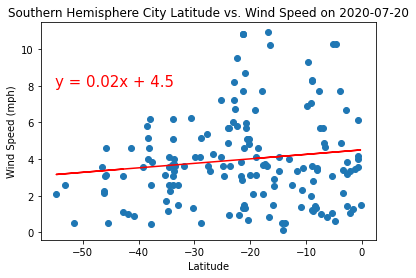

In [25]:
s_wind_speed = southern["Wind Speed"]
x_values = s_lat
y_values = s_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig12.png")
plt.show()